<font size="3">Loading all the required libraries and functions</font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import zipfile
import io
import os
import shutil
import pathlib
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from io import BytesIO
from zipfile import ZipFile

In [ ]:
!pip install gdown

# Replace 'file_id' with the actual file ID of your Google Drive file
file_id = '1YKCXmKoB87LEepkppDQqdDdkk9vuy2pJ'
output_folder = '/content/dogs-vs-cats'

# Download the file
!gdown --id $file_id -O $output_folder

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YKCXmKoB87LEepkppDQqdDdkk9vuy2pJ
To: /content/dogs-vs-cats
100% 852M/852M [00:04<00:00, 201MB/s]


<font size="3"> Importing the JSON Activation Code</font>

Unzipping the Data

In [ ]:
!unzip "/content/dogs-vs-cats" -d "/content/"

Archive:  /content/dogs-vs-cats
  inflating: /content/sampleSubmission.csv  
  inflating: /content/test1.zip      
  inflating: /content/train.zip      


Unzipping Train Data

In [ ]:
!unzip "/content/train" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dog.5499.jpg  
  inflating: /content/train/dog.55.jpg  
  inflating: /content/train/dog.550.jpg  
  inflating: /content/train/dog.5500.jpg  
  inflating: /content/train/dog.5501.jpg  
  inflating: /content/train/dog.5502.jpg  
  inflating: /content/train/dog.5503.jpg  
  inflating: /content/train/dog.5504.jpg  
  inflating: /content/train/dog.5505.jpg  
  inflating: /content/train/dog.5506.jpg  
  inflating: /content/train/dog.5507.jpg  
  inflating: /content/train/dog.5508.jpg  
  inflating: /content/train/dog.5509.jpg  
  inflating: /content/train/dog.551.jpg  
  inflating: /content/train/dog.5510.jpg  
  inflating: /content/train/dog.5511.jpg  
  inflating: /content/train/dog.5512.jpg  
  inflating: /content/train/dog.5513.jpg  
  inflating: /content/train/dog.5514.jpg  
  inflating: /content/train/dog.5515.jpg  
  inflating: /content/train/dog.5516.jpg  
  inflating: /content/train/dog.5517.jpg  
  infla

In [ ]:
!pip install tensorflow==2.12

<font size="4.5"><b> 1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve? </b></font>

<font size="3"> Creating directory named cats vs dogs small to store the images into 3 subsets named train, validation and test and Dividing the training sample of 1000, a validation sample of 500, and a test sample of 500</font>

In [ ]:
import os
import shutil
import pathlib

# Set the paths
original_dir = pathlib.Path("/content/train")
new_base_dir = pathlib.Path("/content/cats_vs_dogs_small")
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok = True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

<font size="3"><u>Data Pre-Processing and functions</u> - Using image_dataset_from_directory to read images and functions</font>

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


<font size="3">Viewing the shape of the images</font>

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


<font size="3"><b> Model - 1 MaxPooling Operation with Increase in filters from <u>32 to 256</u> in <u>5 Input Layers</u></b> : Instantiating a small convnet for dogs vs. cats classification </font>

In [ ]:
#Building the model
#Instantiating a small convnet for dogs vs. cats classification
#*Model - 1 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers*

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


model = keras.Model(inputs=inputs, outputs=outputs)

<font size="3"> Summary of Model - 1 </font>

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

<font size="3"> Training the model 1 </font>

In [ ]:
# Compilimg the results of the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


# Saving the results of the model
callbacks = ModelCheckpoint(
            filepath= "model1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Fitting/Running the Model
Model_1 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/30
32/32 [==============================] - 14s 396ms/step - loss: 0.7025 - accuracy: 0.4940 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 12s 374ms/step - loss: 0.6911 - accuracy: 0.5270 - val_loss: 0.6861 - val_accuracy: 0.5040
Epoch 3/30
32/32 [==============================] - 12s 375ms/step - loss: 0.6882 - accuracy: 0.5210 - val_loss: 0.6944 - val_accuracy: 0.5040
Epoch 4/30
32/32 [==============================] - 12s 376ms/step - loss: 0.6937 - accuracy: 0.5170 - val_loss: 0.6801 - val_accuracy: 0.5000
Epoch 5/30
32/32 [==============================] - 12s 372ms/step - loss: 0.6812 - accuracy: 0.5690 - val_loss: 0.6762 - val_accuracy: 0.5840
Epoch 6/30
32/32 [==============================] - 12s 375ms/step - loss: 0.6632 - accuracy: 0.5550 - val_loss: 0.6971 - val_accuracy: 0.5860
Epoch 7/30
32/32 [==============================] - 12s 378ms/step - loss: 0.6459 - accuracy: 0.6590 - val_loss: 0.6356 - val_accuracy: 0.6420

<font size="3"> Looking at the visuals of the Training and Validation Accuracy/Loss</font>

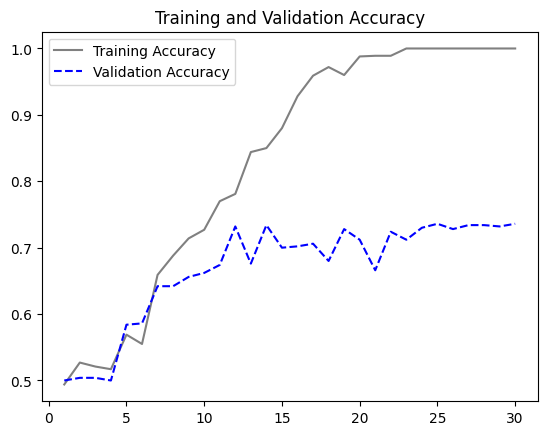

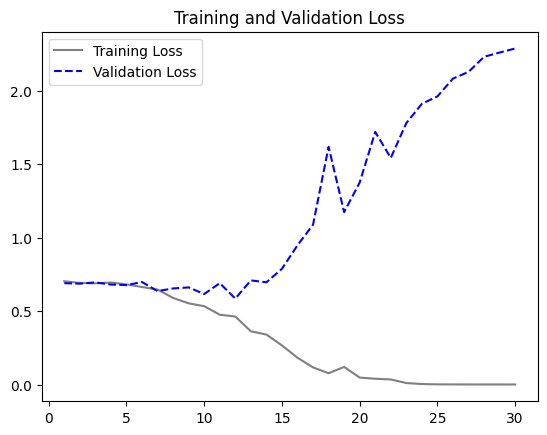

In [ ]:
accuracy = Model_1.history["accuracy"]
val_accuracy = Model_1.history["val_accuracy"]

loss = Model_1.history["loss"]
val_loss = Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3"> Evaluating the performance of Model_1 on test set</font>

In [ ]:
test_model = keras.models.load_model("model1.keras")
Model1_Results = test_model.evaluate(test_dataset)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

16/16 [==============================] - 1s 61ms/step - loss: 0.7104 - accuracy: 0.6640
Loss: 0.710
Accuracy: 0.664


<font size="3"><b> Using Measures to Avoid Overfitting</b></font>

<font size="3"><u>Data Augmentation<u></font>

In [ ]:
# To deprecate warnings that are making the output look clumsy
import logging
logging.getLogger('tensorflow').disabled = True

<font size="3"> Using few of the techniques such as random flip, random zoom, random rotation so as to create augmented versions of the image</font>

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

<font size="3">Looking at the augmented images</font>

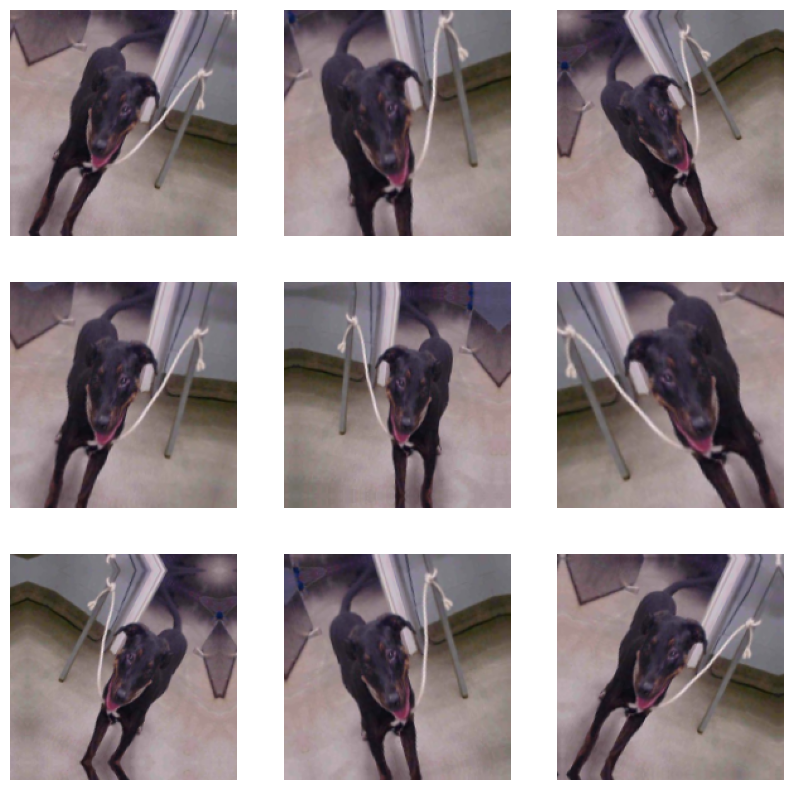

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
   for i in range(9):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

<font size="3"><b> Model - 2 MaxPooling Operation with Increase in filters from <u>32 to 256</u> in <u>5 Input Layers</u> with the data being used from the <u>Augmented Images</u> and a <u>droput rate of 0.5</u>*</b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

<font size="3">Training the model 2</font>

In [ ]:
# Compiling the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Saving the results of the model
callbacks = ModelCheckpoint(
            filepath= "model2.keras",
            save_best_only= True,
            monitor= "val_loss")

# Fitting/Running the Model
Model_2 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/30
32/32 [==============================] - 14s 396ms/step - loss: 0.6965 - accuracy: 0.5010 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 12s 387ms/step - loss: 0.6936 - accuracy: 0.5070 - val_loss: 0.6927 - val_accuracy: 0.5020
Epoch 3/30
32/32 [==============================] - 12s 384ms/step - loss: 0.6934 - accuracy: 0.5060 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 12s 386ms/step - loss: 0.6929 - accuracy: 0.4960 - val_loss: 0.6863 - val_accuracy: 0.6000
Epoch 5/30
32/32 [==============================] - 12s 385ms/step - loss: 0.6890 - accuracy: 0.5560 - val_loss: 0.6864 - val_accuracy: 0.5220
Epoch 6/30
32/32 [==============================] - 12s 385ms/step - loss: 0.6822 - accuracy: 0.5720 - val_loss: 0.6615 - val_accuracy: 0.6080
Epoch 7/30
32/32 [==============================] - 12s 380ms/step - loss: 0.6850 - accuracy: 0.5460 - val_loss: 0.6872 - val_accuracy: 0.5560

<font size="3">Visualizing the Training and Validation Accuracy/Loss 2</font>

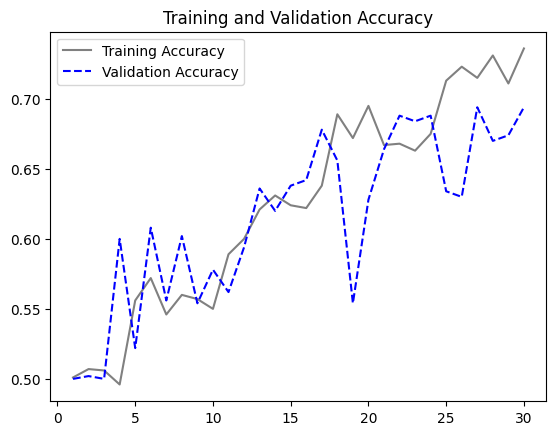

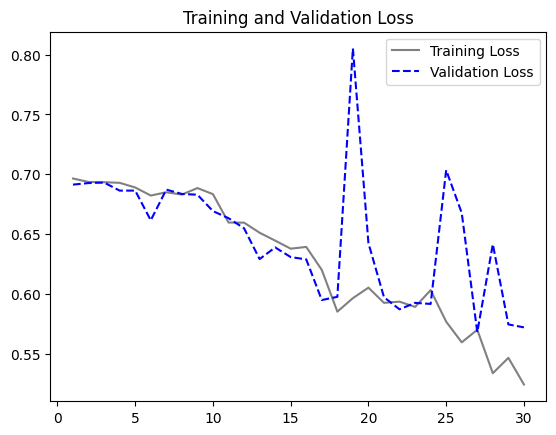

In [ ]:
accuracy = Model_2.history["accuracy"]
val_accuracy = Model_2.history["val_accuracy"]

loss = Model_2.history["loss"]
val_loss = Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3">Evaluating the performance of Model_2 on the test set</font>

In [ ]:
test_model = keras.models.load_model("model2.keras")
Model2_Results = test_model.evaluate(test_dataset)
print(f'Loss: {Model2_Results[0]:.3f}')
print(f'Accuracy: {Model2_Results[1]:.3f}')

16/16 [==============================] - 1s 61ms/step - loss: 0.6298 - accuracy: 0.6900
Loss: 0.630
Accuracy: 0.690


<font size="3"><b>Comparing the Model 1 and Model 2</b> : we can clearly see that the accuracy rate of model 2 is higher than model 1</font>

<font size="3"><b>Model - 3 MaxPooling Operation with Increase in filters from 32 to 512 in <u>6 Input Layers</u> with the use of <u>Augmented Images</u> and <u>Dropout rate of 0.5</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

<font size="3">Training the model 3</font>

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ["accuracy"])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath= "model3.keras",
            save_best_only= True,
            monitor= "val_loss")


# Model Fit
Model_3 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/30
32/32 [==============================] - 15s 395ms/step - loss: 0.6953 - accuracy: 0.5050 - val_loss: 0.6852 - val_accuracy: 0.5380
Epoch 2/30
32/32 [==============================] - 12s 390ms/step - loss: 0.6871 - accuracy: 0.5820 - val_loss: 0.6883 - val_accuracy: 0.5360
Epoch 3/30
32/32 [==============================] - 12s 388ms/step - loss: 0.6944 - accuracy: 0.4960 - val_loss: 0.6924 - val_accuracy: 0.5500
Epoch 4/30
32/32 [==============================] - 13s 390ms/step - loss: 0.6931 - accuracy: 0.5170 - val_loss: 0.6908 - val_accuracy: 0.6000
Epoch 5/30
32/32 [==============================] - 12s 390ms/step - loss: 0.6926 - accuracy: 0.5280 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 6/30
32/32 [==============================] - 12s 390ms/step - loss: 0.6964 - accuracy: 0.4940 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 7/30
32/32 [==============================] - 12s 389ms/step - loss: 0.6864 - accuracy: 0.5350 - val_loss: 0.6849 - val_accuracy: 0.5000

<font size="3">Visualizing the Training and Validation Accuracy/Loss 2</font>

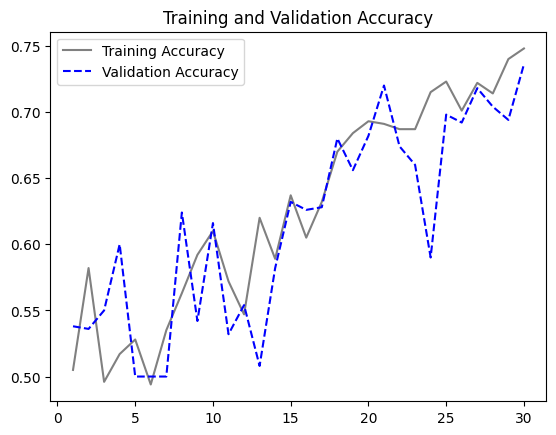

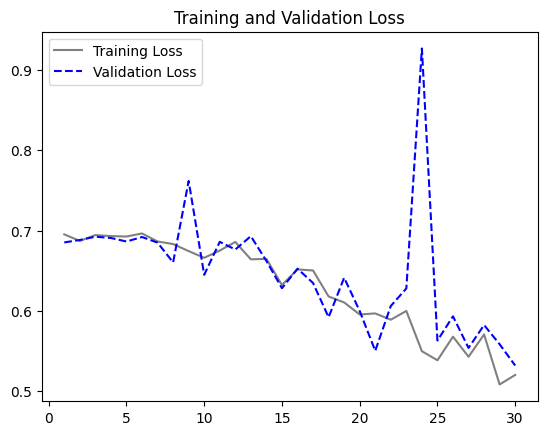

In [ ]:
accuracy = Model_3.history["accuracy"]
val_accuracy = Model_3.history["val_accuracy"]

loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3">Evaluating the performance of Model_2 on the test set</font>

In [ ]:
best_model = keras.models.load_model("model3.keras")
Model3_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model3_Results[0]:.3f}')
print(f'Accuracy: {Model3_Results[1]:.3f}')

16/16 [==============================] - 1s 62ms/step - loss: 0.6425 - accuracy: 0.6960
Loss: 0.643
Accuracy: 0.696


<font size="3"><b>Model - 4 MaxPooling Operation with Increase in filters from <u>64 to 1024</u> in <u>5 Input Layers</u> with the use of <u>Augmented Images</u> and <u>Dropout rate of 0.6</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=1024, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.6)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 89, 89, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 87, 87, 128)       73856     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model4.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_4 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/30
32/32 [==============================] - 35s 1s/step - loss: 0.7125 - accuracy: 0.5000 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 33s 1s/step - loss: 0.6943 - accuracy: 0.4860 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 33s 1s/step - loss: 0.6934 - accuracy: 0.4990 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 33s 1s/step - loss: 0.6929 - accuracy: 0.4890 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 5/30
32/32 [==============================] - 33s 1s/step - loss: 0.6907 - accuracy: 0.5270 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 6/30
32/32 [==============================] - 34s 1s/step - loss: 0.6908 - accuracy: 0.5290 - val_loss: 0.6862 - val_accuracy: 0.5420
Epoch 7/30
32/32 [==============================] - 33s 1s/step - loss: 0.6930 - accuracy: 0.5350 - val_loss: 0.6835 - val_accuracy: 0.5600
Epoch 8/30
32/32 [==

<font size="3">Visualizing the Training and Validation Accuracy/Loss 2</font>

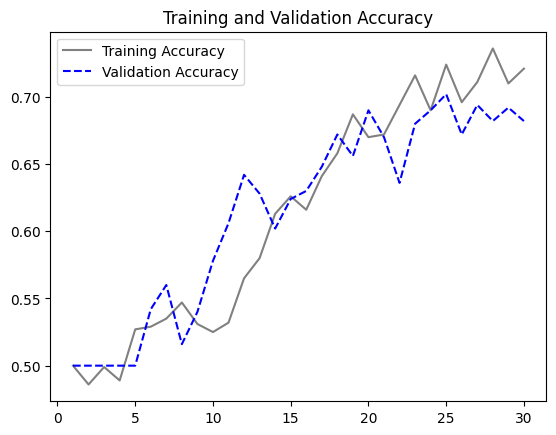

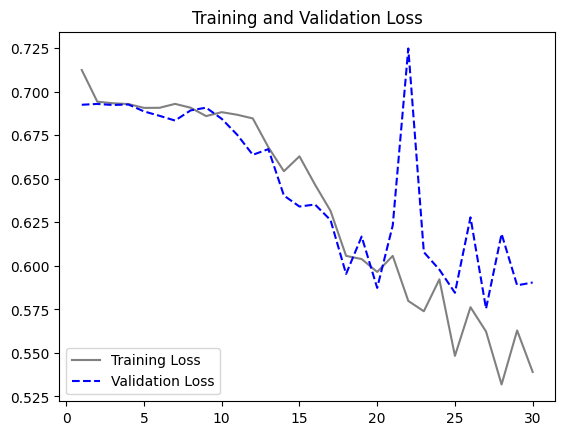

In [ ]:
accuracy = Model_4.history["accuracy"]
val_accuracy = Model_4.history["val_accuracy"]

loss = Model_4.history["loss"]
val_loss = Model_4.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3">Evaluating the performance of Model_2 on the test set</font>

In [ ]:
best_model = keras.models.load_model("model4.keras")
Model4_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model4_Results[0]:.3f}')
print(f'Accuracy: {Model4_Results[1]:.3f}')

16/16 [==============================] - 3s 156ms/step - loss: 0.6222 - accuracy: 0.6880
Loss: 0.622
Accuracy: 0.688


<font size="3"><b>Summary for Question 1</b>: We did try to build 4 models with the training sample being 1000. Now lets compare the loss and Accuracy of all the 4 models to see which model gives better result</font>

<font size="3"><b>Model 1:</b> filters from 32 to 256, 5 Input Layers</font>

<font size="3"><b>Model 2:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5</font>

<font size="3"><b>Model 3:</b> filters from 32 to 512, 6 Input Layers, Augmented Images and Dropout rate of 0.5</font>

<font size="3"><b>Model 4:</b> filters from 64 to 1024, 5 Input Layers, Augmented Images and Dropout rate of 0.6 </font>

In [ ]:
Model_1 = (0.710, 0.664)
Model_2 = (0.630, 0.690)
Model_3 = (0.643,0.696)
Model_4 = (0.622, 0.688)

In [ ]:
Models = ("Mod_1","Mod_2","Mod_3","Mod_4")
Loss = (Model_1[0],Model_2[0],Model_3[0],Model_4[0])
Accuracy = (Model_1[1],Model_2[1],Model_3[1],Model_4[1])

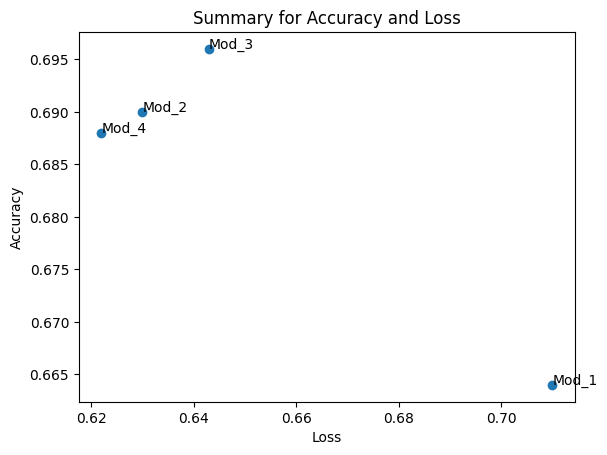

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Loss,Accuracy)
for i, txt in enumerate(Models):
    ax.annotate(txt, (Loss[i],Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

<font size="3"><b> Conclusions:</b> From the above graph we can conclude that model 3 is the best amoung all with higher accuracy and minimum loss, however model model 4 has the highest loss </font>

<font size="3"><b> Recommendation:</b> As we can see model 3 is performing best amoung all 4 models hence we should choose model with filters from  filters from 32 to 512, 5 Input Layers, Augmented Images and Dropout rate of 0.5 </font>

*<font size="4.5"><b> 2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch).What performance did you achieve? </b></font>*

<font size="3"><b>Considering Training Sample - 2000 </b></font>

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

<font size="3"><b>Data Pre-Processing: </b> Using image_dataset_from_directory to read images</font>

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


<font size="3">Viewing the size of the images</font>

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


<font size="3"><font size="3">Viewing the size of the images</font></font>

In [ ]:
data_augmentation_1 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

<font size="3"><b>Model - 5 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 <u>(Training Sample - 2000)</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

<font size="3">Training the model 5</font>

In [ ]:

# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model5.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_5 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
63/63 [==============================] - 27s 397ms/step - loss: 0.6944 - accuracy: 0.5075 - val_loss: 0.6928 - val_accuracy: 0.5520
Epoch 2/50
63/63 [==============================] - 25s 395ms/step - loss: 0.6926 - accuracy: 0.5440 - val_loss: 0.6883 - val_accuracy: 0.5320
Epoch 3/50
63/63 [==============================] - 25s 401ms/step - loss: 0.6809 - accuracy: 0.5795 - val_loss: 0.6843 - val_accuracy: 0.5220
Epoch 4/50
63/63 [==============================] - 25s 400ms/step - loss: 0.6800 - accuracy: 0.5505 - val_loss: 0.6741 - val_accuracy: 0.5520
Epoch 5/50
63/63 [==============================] - 25s 399ms/step - loss: 0.6676 - accuracy: 0.5920 - val_loss: 0.6737 - val_accuracy: 0.6340
Epoch 6/50
63/63 [==============================] - 25s 404ms/step - loss: 0.6472 - accuracy: 0.6405 - val_loss: 0.6285 - val_accuracy: 0.6460
Epoch 7/50
63/63 [==============================] - 25s 399ms/step - loss: 0.6424 - accuracy: 0.6345 - val_loss: 0.6472 - val_accuracy: 0.6280

<font size="3">Visualizing the Training and Validation Accuracy/Loss 2</font>

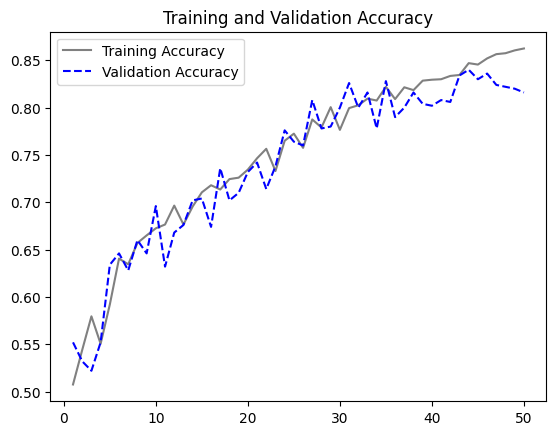

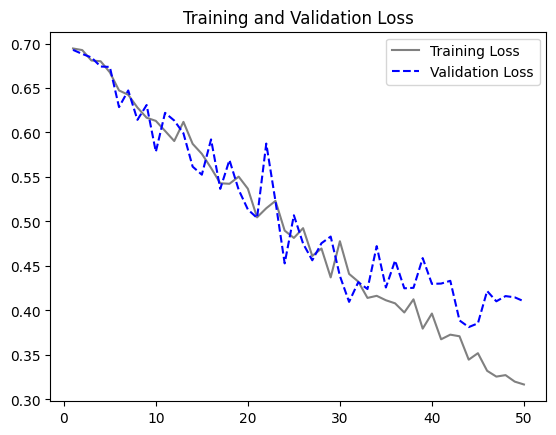

In [ ]:
accuracy = Model_5.history["accuracy"]
val_accuracy = Model_5.history["val_accuracy"]

loss = Model_5.history["loss"]
val_loss = Model_5.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3">Evaluating the performance of Model_5 on test set</font>

In [ ]:
best_model = keras.models.load_model("model5.keras")
Model5_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model5_Results[0]:.3f}')
print(f'Accuracy: {Model5_Results[1]:.3f}')

16/16 [==============================] - 1s 61ms/step - loss: 0.4558 - accuracy: 0.8000
Loss: 0.456
Accuracy: 0.800


<font size="3"> <b>Summary :</b> The second model built just with 1000 training samples resulted in 69% accuracy whereas the same model with an further increase in training samples to 2000 spiked the accuracy to 80% i.e. 11% increase in the accuracy.</font>

<font size="3"><b>Model - 6 Strides Operation with <u>Padding being "Same"</u> with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 <u>(Training Sample - 2000)</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 90, 90, 32)        896       
                                                                 
 conv2d_27 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 conv2d_28 (Conv2D)          (None, 23, 23, 128)       73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 256)       2951

<font size="3">Training the model 6</font>

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model6.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_6 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
63/63 [==============================] - 7s 91ms/step - loss: 0.6950 - accuracy: 0.5015 - val_loss: 0.6922 - val_accuracy: 0.5120
Epoch 2/50
63/63 [==============================] - 5s 86ms/step - loss: 0.6938 - accuracy: 0.5200 - val_loss: 0.6907 - val_accuracy: 0.5380
Epoch 3/50
63/63 [==============================] - 5s 84ms/step - loss: 0.6924 - accuracy: 0.5235 - val_loss: 0.6930 - val_accuracy: 0.4840
Epoch 4/50
63/63 [==============================] - 6s 88ms/step - loss: 0.6913 - accuracy: 0.5200 - val_loss: 0.6829 - val_accuracy: 0.5500
Epoch 5/50
63/63 [==============================] - 5s 86ms/step - loss: 0.6893 - accuracy: 0.5455 - val_loss: 0.6828 - val_accuracy: 0.5840
Epoch 6/50
63/63 [==============================] - 5s 84ms/step - loss: 0.6890 - accuracy: 0.5310 - val_loss: 0.6760 - val_accuracy: 0.5940
Epoch 7/50
63/63 [==============================] - 5s 85ms/step - loss: 0.6891 - accuracy: 0.5395 - val_loss: 0.6759 - val_accuracy: 0.6180
Epoch 8/50
63

<font size="3">Visualizing the Training and Validation Accuracy/Loss</font>

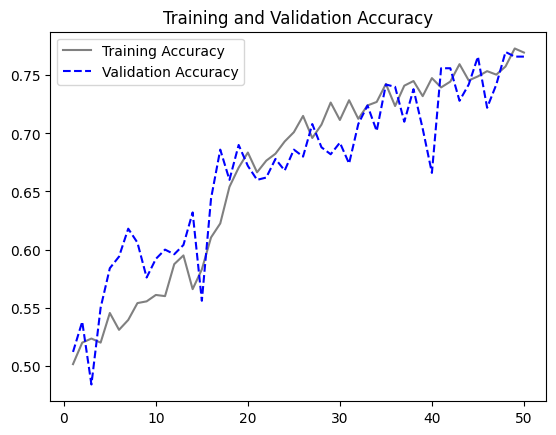

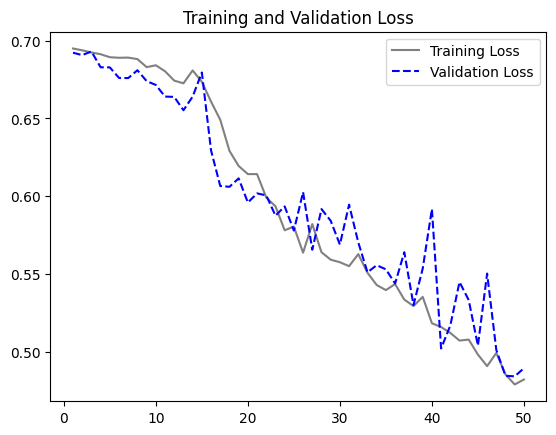

In [ ]:
accuracy = Model_6.history["accuracy"]
val_accuracy = Model_6.history["val_accuracy"]

loss = Model_6.history["loss"]
val_loss = Model_6.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3">Evaluating the performance of Model_6 on test set</font>

In [ ]:
best_model = keras.models.load_model("model6.keras")
Model6_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model6_Results[0]:.3f}')
print(f'Accuracy: {Model6_Results[1]:.3f}')

16/16 [==============================] - 0s 18ms/step - loss: 0.5640 - accuracy: 0.7320
Loss: 0.564
Accuracy: 0.732


<font size="3"><b>Summary for Question 2</b>: We did try to build 2 more models with training sample being 2000. Now lets compare the loss and Accuracy of 3 models to see which model gives better result</font>

<font size="3"><b>Model 2:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5, training size 1000</font>

<font size="3"><b>Model 5:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5, <u>training size 2000</u></font>

<font size="3"><b>Model 6:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5, <u>training size 2000</u>, <u>Padding being same</u> </font>

In [ ]:
Model_5 = (0.456,0.800)
Model_6 = (0.564,0.732)

In [ ]:
Models_2 = ("Mod_2","Mod_5","Mod_6")
Loss_2 = (Model_2[0],Model_5[0],Model_6[0])
Accuracy_2 = (Model_2[1],Model_5[1],Model_6[1])

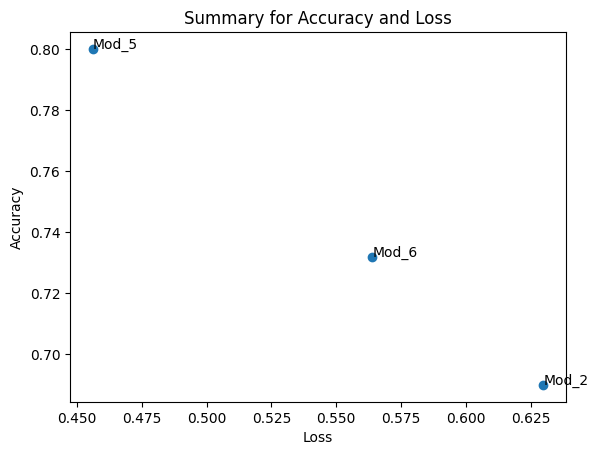

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Loss_2,Accuracy_2)
for i, txt in enumerate(Models_2):
    ax.annotate(txt, (Loss_2[i],Accuracy_2[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

By comparing the models' performances, it was shown that the model did not gain much from using strides with padding. With a Max Pooling Layer, Model 5 outperformed the Strides model in accuracy by 13%. Moreover, an increased accuracy of 80% was attained by fine-tuning the network and expanding the training dataset from 1000 to 2000 samples.


We plotted Models 5 and 6 to answer the second question and provide a visual comparison of their performance. The graphs clearly show that Model 5 had the lowest loss of 45.6% and the highest accuracy of all the models, reaching 80%. The model performed significantly better once the training samples were increased to 2000 and various augmented photos were added.


<font size="4.5"><b> *3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results *</b></font>

<font size="3"> As we saw in above graph that with the increase in training sample size the Accuracy is also increasing hence will <b>increase the sample size to 3000 and 5000</u> for better performance </font>

<font size="3"><b> Training Sample 3000</b> </font>

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


<font size="3"> Using few of the techniques such as random flip, random zoom, random rotation so as to create augmented versions of the image</font>

In [ ]:
data_augmentation_2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)


<font size="3"><b>Model - 7 <u>MaxPooling Operation</u> with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 <u>(Training Sample - 3000)</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model7.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_7 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
94/94 [==============================] - 39s 395ms/step - loss: 0.6941 - accuracy: 0.5053 - val_loss: 0.6941 - val_accuracy: 0.5020
Epoch 2/50
94/94 [==============================] - 37s 392ms/step - loss: 0.6848 - accuracy: 0.5620 - val_loss: 0.6629 - val_accuracy: 0.5860
Epoch 3/50
94/94 [==============================] - 37s 394ms/step - loss: 0.6701 - accuracy: 0.5790 - val_loss: 0.6978 - val_accuracy: 0.5200
Epoch 4/50
94/94 [==============================] - 37s 391ms/step - loss: 0.6484 - accuracy: 0.6227 - val_loss: 0.6292 - val_accuracy: 0.6460
Epoch 5/50
94/94 [==============================] - 37s 394ms/step - loss: 0.6379 - accuracy: 0.6357 - val_loss: 0.5948 - val_accuracy: 0.6980
Epoch 6/50
94/94 [==============================] - 37s 395ms/step - loss: 0.6076 - accuracy: 0.6677 - val_loss: 0.6350 - val_accuracy: 0.6320
Epoch 7/50
94/94 [==============================] - 37s 392ms/step - loss: 0.6103 - accuracy: 0.6657 - val_loss: 0.6425 - val_accuracy: 0.6400

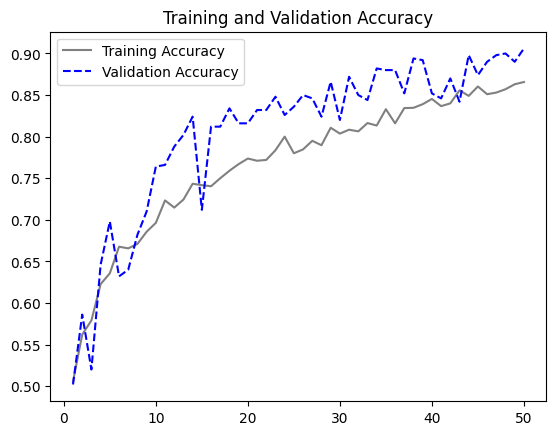

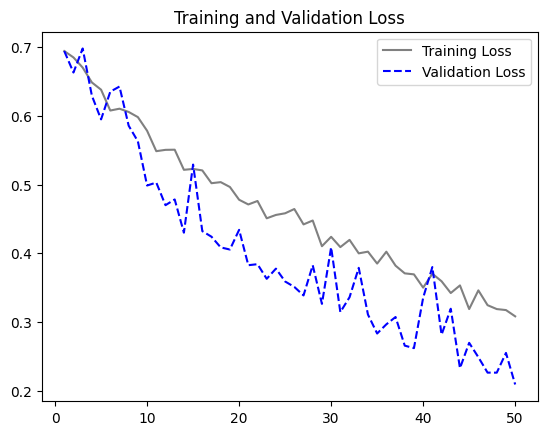

In [ ]:
accuracy = Model_7.history["accuracy"]
val_accuracy = Model_7.history["val_accuracy"]

loss = Model_7.history["loss"]
val_loss = Model_7.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("model7.keras")
Model7_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model7_Results[0]:.3f}')
print(f'Accuracy: {Model7_Results[1]:.3f}')

16/16 [==============================] - 1s 67ms/step - loss: 0.4545 - accuracy: 0.8340
Loss: 0.455
Accuracy: 0.834


<font size="3">Though the results were not as encouraging as anticipated, we sought to replace the traditional max pooling process in the preceding Model 6 with strides. for model 7, we exclusively employed Maxpooling. So, in order to assess the effectiveness of this new model, we are investigating a hybrid strategy that incorporates both max pooling and strides.</font>

<font size="3">A downsampling technique called max pooling aims to retain the most salient features while removing less significant data by shrinking the spatial dimensions of the feature map. Conversely, strides establish the sliding window's step rate, which is utilized to extract and interpret the data's attributes. In order to enhance the model's capacity to capture complex patterns and characteristics while preserving computational efficiency, this hybrid strategy attempts to capitalize on the benefits of both approaches.
</font>

<font size="3"><b>Model - 8 <u>MaxPooling + Strides of Step-Size 2 Operation</u> with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 (Training Sample - 3000)</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2,strides=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model8.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_8 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
94/94 [==============================] - 38s 387ms/step - loss: 0.6939 - accuracy: 0.5033 - val_loss: 0.6778 - val_accuracy: 0.5760
Epoch 2/50
94/94 [==============================] - 36s 379ms/step - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 3/50
94/94 [==============================] - 36s 382ms/step - loss: 0.6907 - accuracy: 0.5253 - val_loss: 0.6876 - val_accuracy: 0.5420
Epoch 4/50
94/94 [==============================] - 35s 377ms/step - loss: 0.6913 - accuracy: 0.5140 - val_loss: 0.6879 - val_accuracy: 0.5100
Epoch 5/50
94/94 [==============================] - 36s 378ms/step - loss: 0.6871 - accuracy: 0.5433 - val_loss: 0.6697 - val_accuracy: 0.5560
Epoch 6/50
94/94 [==============================] - 35s 376ms/step - loss: 0.6703 - accuracy: 0.5883 - val_loss: 0.6631 - val_accuracy: 0.5780
Epoch 7/50
94/94 [==============================] - 36s 380ms/step - loss: 0.6728 - accuracy: 0.5853 - val_loss: 0.6372 - val_accuracy: 0.6540

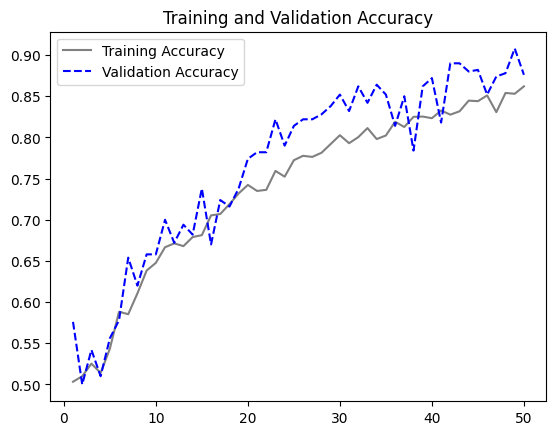

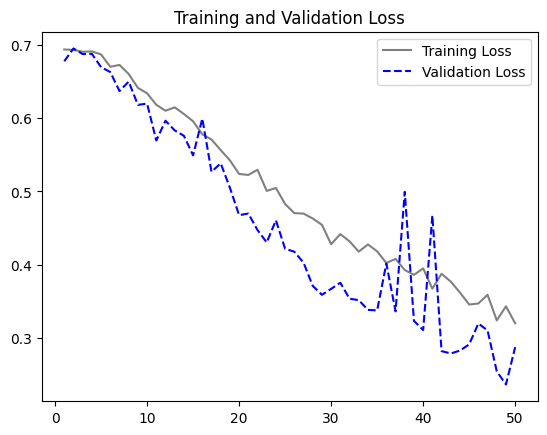

In [ ]:
accuracy = Model_8.history["accuracy"]
val_accuracy = Model_8.history["val_accuracy"]

loss = Model_8.history["loss"]
val_loss = Model_8.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("model8.keras")
Model8_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model8_Results[0]:.3f}')
print(f'Accuracy: {Model8_Results[1]:.3f}')

16/16 [==============================] - 1s 57ms/step - loss: 0.4137 - accuracy: 0.8260
Loss: 0.414
Accuracy: 0.826


<font size="3"><b>Model - 9 <u>MaxPooling + Strides of Step-Size 2 with Padding</u> turned on Operation with Increase in filters from 32 to 512 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 <u>(Training Sample - 3000)</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2,strides=2, padding="same")(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model9.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_9 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
94/94 [==============================] - 41s 423ms/step - loss: 0.6954 - accuracy: 0.5210 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/50
94/94 [==============================] - 39s 415ms/step - loss: 0.6937 - accuracy: 0.4950 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/50
94/94 [==============================] - 39s 410ms/step - loss: 0.6839 - accuracy: 0.5450 - val_loss: 0.6858 - val_accuracy: 0.5040
Epoch 4/50
94/94 [==============================] - 39s 413ms/step - loss: 0.6861 - accuracy: 0.5343 - val_loss: 0.6828 - val_accuracy: 0.5020
Epoch 5/50
94/94 [==============================] - 39s 410ms/step - loss: 0.6808 - accuracy: 0.5537 - val_loss: 0.6418 - val_accuracy: 0.6380
Epoch 6/50
94/94 [==============================] - 38s 408ms/step - loss: 0.6635 - accuracy: 0.6167 - val_loss: 0.7314 - val_accuracy: 0.6140
Epoch 7/50
94/94 [==============================] - 39s 411ms/step - loss: 0.6515 - accuracy: 0.6307 - val_loss: 0.6186 - val_accuracy: 0.6640

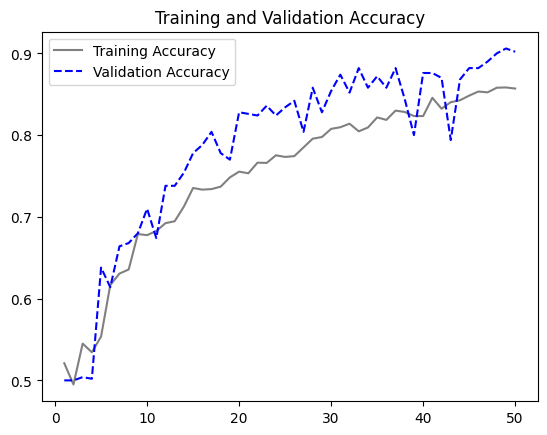

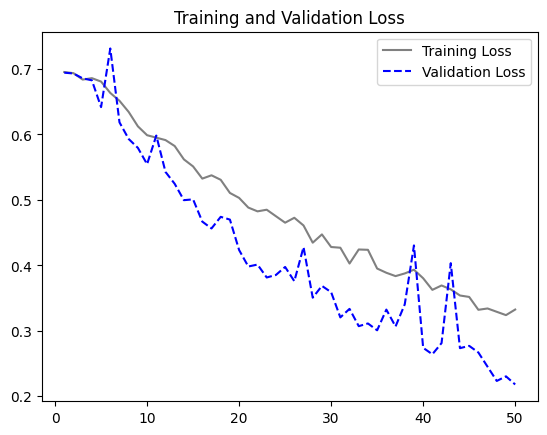

In [ ]:
accuracy = Model_9.history["accuracy"]
val_accuracy = Model_9.history["val_accuracy"]

loss = Model_9.history["loss"]
val_loss = Model_9.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("model9.keras")
Model9_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model9_Results[0]:.3f}')
print(f'Accuracy: {Model9_Results[1]:.3f}')

16/16 [==============================] - 1s 63ms/step - loss: 0.4706 - accuracy: 0.8180
Loss: 0.471
Accuracy: 0.818


<font size="3">Let's see which of the models have best performance when the training sample was set to 3000. Note: Here models 8 and 9 were trained differently with strides being used with maxpooling and strides being used with maxpooling and padding turned on.</font>

<font size="3"><b>Model 6:</b> trides Operation with Padding being "Same" ,filters from 32 to 512, 5 Input Layers, droput rate of 0.5, Training Sample - 3000</font>

<font size="3"><b>Model 7:</b> MaxPooling Operation,filters from 32 to 512, 5 Input Layers, droput rate of 0.5, Training Sample - 3000</font>

<font size="3"><b>Model 8:</b> MaxPooling + Strides of Step-Size 2,filters from 32 to 512, 5 Input Layers, droput rate of 0.5, Training Sample - 3000</font>

<font size="3"><b>Model 9:</b> MaxPooling + Strides of Step-Size 2 with Padding turned on,filters from 32 to 512, 5 Input Layers, droput rate of 0.5, Training Sample - 3000 </font>

In [ ]:
Model_7 = (0.455,0.834)
Model_8 = (0.414,0.826)
Model_9 = (0.471,0.818)

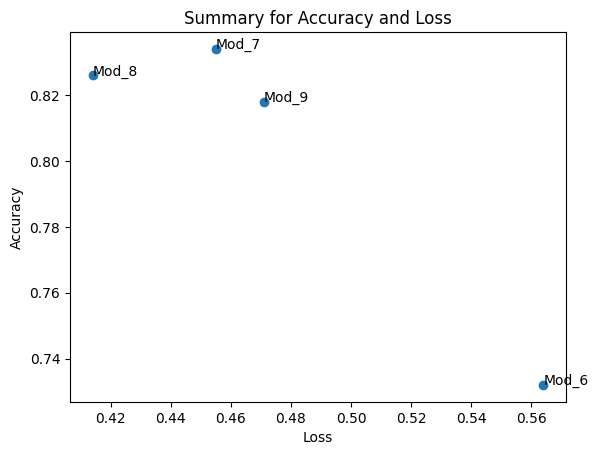

In [ ]:
Models_3 = ("Mod_6","Mod_7","Mod_8","Mod_9")
Loss_3 = (Model_6[0],Model_7[0],Model_8[0],Model_9[0])
Accuracy_3 = (Model_6[1],Model_7[1],Model_8[1],Model_9[1])

fig, ax = plt.subplots()
ax.scatter(Loss_3,Accuracy_3)
for i, txt in enumerate(Models_3):
    ax.annotate(txt, (Loss_3[i],Accuracy_3[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

Here we can clearly see that the model which was built with 5 layers using maxpooling along with strides and padding on was giving the highest accuracy i.e. 83.4 % with least loss amoung the other 2 models i.e. 41.9%.

Now, we are increasing the training sample to 5000 and building a model from scratch to check it's performance on the unseen data.

<font size="3"><b>Training Sample - 5000<b></font>

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=2500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 5000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
data_augmentation_3 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

<font size="3"><b>Model - 10 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 <u>(Training Sample - 5000)</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_3(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model10.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_10 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
157/157 [==============================] - 60s 368ms/step - loss: 0.6943 - accuracy: 0.5030 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 2/50
157/157 [==============================] - 58s 367ms/step - loss: 0.6839 - accuracy: 0.5534 - val_loss: 0.6685 - val_accuracy: 0.5340
Epoch 3/50
157/157 [==============================] - 58s 368ms/step - loss: 0.6672 - accuracy: 0.5908 - val_loss: 0.6485 - val_accuracy: 0.5920
Epoch 4/50
157/157 [==============================] - 58s 369ms/step - loss: 0.6305 - accuracy: 0.6536 - val_loss: 0.5638 - val_accuracy: 0.6940
Epoch 5/50
157/157 [==============================] - 58s 368ms/step - loss: 0.6213 - accuracy: 0.6618 - val_loss: 0.5537 - val_accuracy: 0.7160
Epoch 6/50
157/157 [==============================] - 57s 366ms/step - loss: 0.5967 - accuracy: 0.6778 - val_loss: 0.5411 - val_accuracy: 0.7060
Epoch 7/50
157/157 [==============================] - 57s 365ms/step - loss: 0.5860 - accuracy: 0.6936 - val_loss: 0.5293 - val_ac

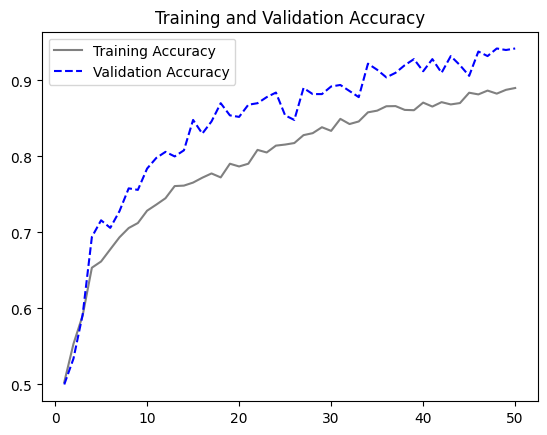

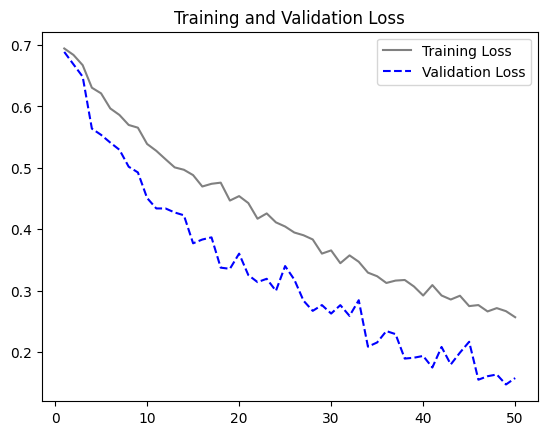

In [ ]:
accuracy = Model_10.history["accuracy"]
val_accuracy = Model_10.history["val_accuracy"]

loss = Model_10.history["loss"]
val_loss = Model_10.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("model10.keras")
Model10_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model10_Results[0]:.3f}')
print(f'Accuracy: {Model10_Results[1]:.3f}')

16/16 [==============================] - 1s 58ms/step - loss: 0.2167 - accuracy: 0.9020
Loss: 0.217
Accuracy: 0.902


<font size="3"><b>Summary for que 3</b>, Out of the four models we built, three were trained using a 3000 sample size. The accuracy of the best-performing model was 83.4%. The accuracy increased to 90.2% when we increased the training sample to 5000. As a result, we conclude that the model performs significantly better when the training sample is increased to 5000.As for the tenable explanation for the validation loss being less than the training loss, the split technique that was used most likely had an impact. The validation and test sets are fixed at 500 each, yet the training sample in this instance is almost as large as 5000. Furthermore, it is crucial to recognize that regularizations—like dropout or L1 and L2 regularizers—have a big impact on training and help compute the training loss
 Conversely, during the validation or test phase, these regularizers are disabled, potentially leading to a lower loss compared to the training loss.</font>

*<font size="4.5"><b> 4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance </b></font>*

<font size="4.5"><b> Leveraging a Pre-Trained Model - VGG16 </b></font>

<font size="4.5"><b> VGG - Model 1 (1000 Training Samples) </b></font>

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
#extracting VGG 16 features and Labels
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 448ms/step


In [ ]:
train_features.shape

(5000, 5, 5, 512)

<font size="4.5"><b> VGG - Model 1 Dense Layer with 256 Nodes and Droput Rate of 0.5 and optimizer being rmsprop with the Original Images</b></font>

In [ ]:
# Defining and Training the densely connected classifier
# The last dense stacked layer and the classifier
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)


# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath="vgg_model1.keras",
            save_best_only=True,
            monitor="val_loss")


# Model Fit
VGG_Model_1 = model.fit(
              train_features, train_labels,
              epochs= 30,
              validation_data= (val_features, val_labels),
              callbacks= callbacks)

Epoch 1/30
157/157 [==============================] - 2s 10ms/step - loss: 11.9662 - accuracy: 0.9470 - val_loss: 0.3880 - val_accuracy: 0.9960
Epoch 2/30
157/157 [==============================] - 1s 9ms/step - loss: 3.3200 - accuracy: 0.9794 - val_loss: 0.1504 - val_accuracy: 0.9960
Epoch 3/30
157/157 [==============================] - 1s 9ms/step - loss: 2.6720 - accuracy: 0.9858 - val_loss: 1.9751 - val_accuracy: 0.9860
Epoch 4/30
157/157 [==============================] - 1s 8ms/step - loss: 1.5012 - accuracy: 0.9888 - val_loss: 0.3018 - val_accuracy: 0.9920
Epoch 5/30
157/157 [==============================] - 1s 8ms/step - loss: 1.0958 - accuracy: 0.9922 - val_loss: 0.5635 - val_accuracy: 0.9960
Epoch 6/30
157/157 [==============================] - 1s 8ms/step - loss: 0.7632 - accuracy: 0.9940 - val_loss: 0.4840 - val_accuracy: 0.9960
Epoch 7/30
157/157 [==============================] - 1s 9ms/step - loss: 0.2360 - accuracy: 0.9982 - val_loss: 6.6481e-25 - val_accuracy: 1.0000


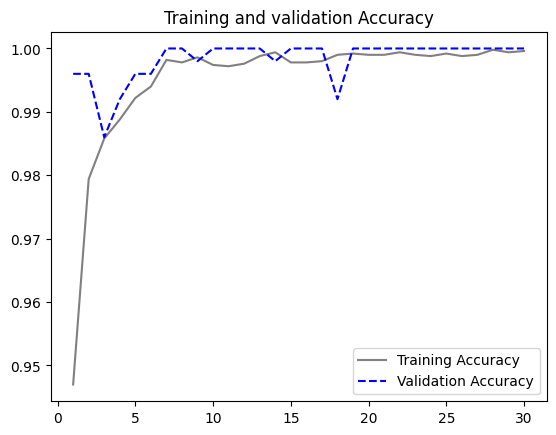

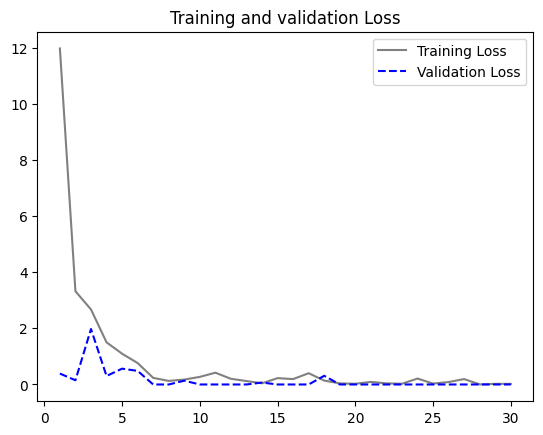

In [ ]:
acc = VGG_Model_1.history["accuracy"]
val_acc = VGG_Model_1.history["val_accuracy"]

loss = VGG_Model_1.history["loss"]
val_loss = VGG_Model_1.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("vgg_model1.keras")
VGG_Model_1_Results = best_model.evaluate(test_features,test_labels)
print(f'Loss: {VGG_Model_1_Results[0]:.3f}')
print(f'Accuracy: {VGG_Model_1_Results[1]:.3f}')

16/16 [==============================] - 0s 2ms/step - loss: 1.3478e-19 - accuracy: 1.0000
Loss: 0.000
Accuracy: 1.000


<font size="4.5"><b> VGG - Model 2 (1000 Training Samples) </b></font>

The pre-trained model is set up to only allow the classifier and densely connected networks to modify their weights while the pre-trained model maintains its original weights throughout training.

Because the pre-trained model stays constant and gives the model a strong basis, this method helps prevent overfitting. Frozen pre-trained model training can also be especially helpful in situations when there are limited training data and processing resources.

The list of trainable weights can be printed both before and after the pre-trained model is frozen to show the effect of this setup.


In [ ]:
# Before Freezing
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
# After Freezing
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

<font size="4.5"><b> VGG - Model 2 Dense Layer with 256 Nodes and Droput Rate of 0.5 and optimizer being rmsprop with the Augmented Images</b></font>

In [ ]:
# Data Augmentation -Adding a data augmentation stage to provide augmented training samples and a classifier to the convolutional base
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# Adding the Classifier and Dense Network
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)


In [ ]:
# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath= "vgg_model2.keras",
            save_best_only= True,
            monitor= "val_loss")

# Model Fit
VGG_Model_2 = model.fit(
              train_dataset,
              epochs= 30,
              validation_data=validation_dataset,
              callbacks=callbacks)

Epoch 1/30
157/157 [==============================] - 125s 791ms/step - loss: 11.3191 - accuracy: 0.9240 - val_loss: 1.8490 - val_accuracy: 0.9820
Epoch 2/30
157/157 [==============================] - 125s 799ms/step - loss: 6.3242 - accuracy: 0.9504 - val_loss: 1.2612 - val_accuracy: 0.9840
Epoch 3/30
157/157 [==============================] - 122s 779ms/step - loss: 4.1535 - accuracy: 0.9614 - val_loss: 1.2331 - val_accuracy: 0.9860
Epoch 4/30
157/157 [==============================] - 123s 787ms/step - loss: 3.6730 - accuracy: 0.9640 - val_loss: 0.2614 - val_accuracy: 0.9920
Epoch 5/30
157/157 [==============================] - 122s 779ms/step - loss: 2.9338 - accuracy: 0.9668 - val_loss: 0.1052 - val_accuracy: 0.9980
Epoch 6/30
157/157 [==============================] - 122s 780ms/step - loss: 2.4211 - accuracy: 0.9650 - val_loss: 0.5442 - val_accuracy: 0.9900
Epoch 7/30
157/157 [==============================] - 123s 783ms/step - loss: 1.8757 - accuracy: 0.9660 - val_loss: 0.0139 

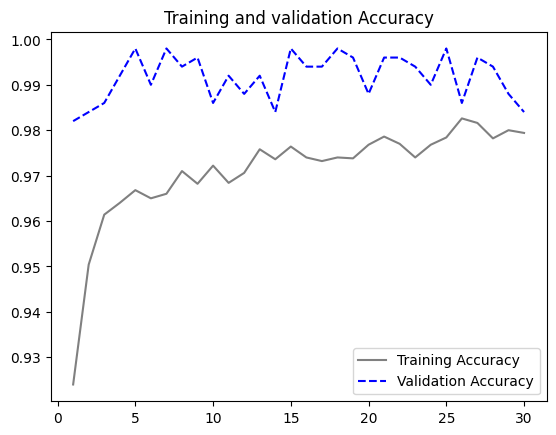

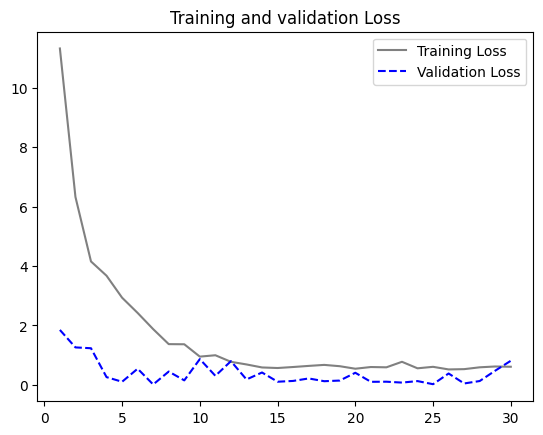

In [ ]:
acc = VGG_Model_2.history["accuracy"]
val_acc = VGG_Model_2.history["val_accuracy"]

loss = VGG_Model_2.history["loss"]
val_loss = VGG_Model_2.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("vgg_model2.keras")
VGG_Model_2_Results= best_model.evaluate(test_dataset)
print(f'Loss: {VGG_Model_2_Results[0]:.3f}')
print(f'Accuracy: {VGG_Model_2_Results[1]:.3f}')

16/16 [==============================] - 11s 700ms/step - loss: 0.7295 - accuracy: 0.9860
Loss: 0.729
Accuracy: 0.986


<font size="4.5"><b> Fine Tuning the VGG_Model_2</b></font>

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

<font size="4.5">It is important to note that pre-trained networks are trained to handle a variety of use cases and classifications; they are not only employed for solitary picture classification jobs. The network's top layers are good at gathering broad data, while its lower levels usually focus on extracting features unique to the given issue. If we choose to freeze the first few layers, we may essentially stop overfitting and allow the model to incorporate more complex information related to our particular categorization goal. By using a strategic approach, the model is encouraged to concentrate on understanding the subtle features of the target categorization problem.
</font>

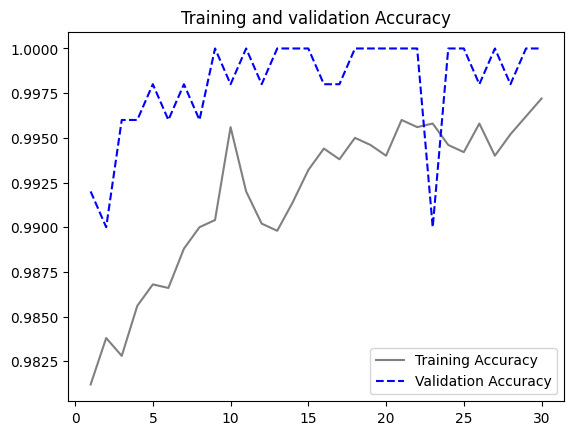

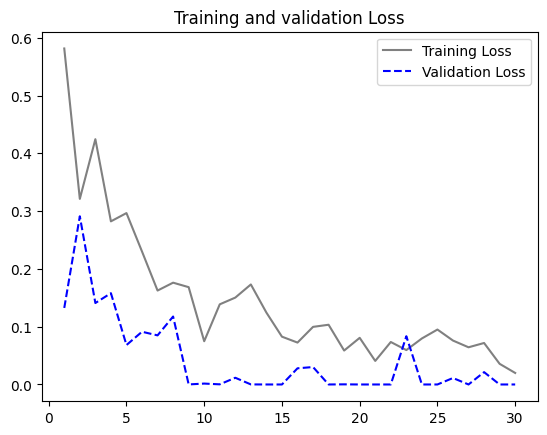

In [ ]:
acc = FineTuned_VGG_Model_2.history["accuracy"]
val_acc = FineTuned_VGG_Model_2.history["val_accuracy"]

loss = FineTuned_VGG_Model_2.history["loss"]
val_loss = FineTuned_VGG_Model_2.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("fine_tuning_vgg_model2.keras")
FineTuned_VGG_Model_2_Results = best_model.evaluate(test_dataset)
print(f"Loss: {FineTuned_VGG_Model_2_Results[0]:.3f}")
print(f"Accuracy: {FineTuned_VGG_Model_2_Results[1]:.3f}")

16/16 [==============================] - 1s 31ms/step - loss: 4.7333e-08 - accuracy: 1.0000
Loss: 0.000
Accuracy: 1.000


<font size="4.5"> Using the pre-trained network VGG16, we created three models for the examination of the above two VGG16 models. Interestingly, we found that accuracy increased when the pre-trained network was frozen in its first layers and prevented from altering its weights during training. As such, we want to use the same methods with a training sample size of 5000 to construct two models.


<font size="4.5"><b> VGG - Model 3 (5000 Training Samples) </b></font>

In [ ]:
conv_base= keras.applications.vgg16.VGG16(
           weights="imagenet",
           include_top=False)

conv_base.trainable = False


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 5000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
# Data Augmentation
data_augmentation_4 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25),
    ]
)

# Adding the Classifier and Dense Network
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_4(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath= "vgg_model3.keras",
            save_best_only= True,
            monitor= "val_loss")

# Model Fit
VGG_Model_3 = model.fit(
              train_dataset,
              epochs= 50,
              validation_data=validation_dataset,
              callbacks=callbacks)

Epoch 1/50
157/157 [==============================] - 8s 41ms/step - loss: 10.5988 - accuracy: 0.9154 - val_loss: 1.8303 - val_accuracy: 0.9860
Epoch 2/50
157/157 [==============================] - 6s 40ms/step - loss: 6.1195 - accuracy: 0.9448 - val_loss: 0.8026 - val_accuracy: 0.9860
Epoch 3/50
157/157 [==============================] - 6s 38ms/step - loss: 4.1963 - accuracy: 0.9504 - val_loss: 1.0276 - val_accuracy: 0.9840
Epoch 4/50
157/157 [==============================] - 6s 40ms/step - loss: 2.2763 - accuracy: 0.9618 - val_loss: 0.1023 - val_accuracy: 0.9960
Epoch 5/50
157/157 [==============================] - 6s 38ms/step - loss: 1.9037 - accuracy: 0.9580 - val_loss: 0.2311 - val_accuracy: 0.9940
Epoch 6/50
157/157 [==============================] - 6s 40ms/step - loss: 0.9389 - accuracy: 0.9644 - val_loss: 0.0859 - val_accuracy: 0.9960
Epoch 7/50
157/157 [==============================] - 6s 38ms/step - loss: 0.6627 - accuracy: 0.9674 - val_loss: 0.1129 - val_accuracy: 0.996

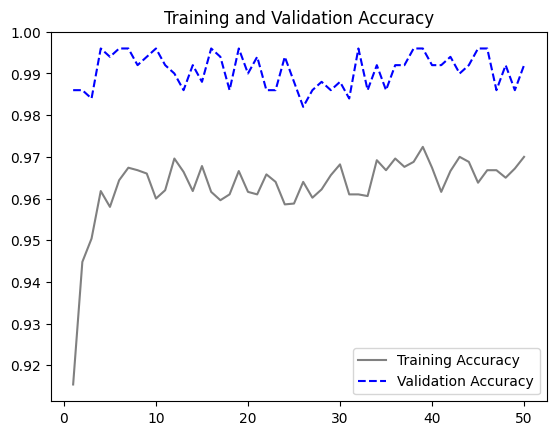

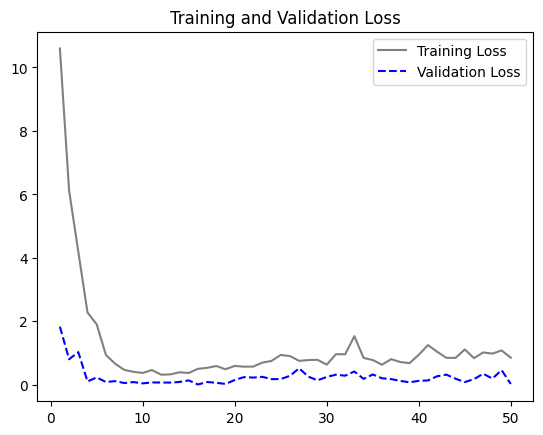

In [ ]:
acc = VGG_Model_3.history["accuracy"]
val_acc = VGG_Model_3.history["val_accuracy"]

loss = VGG_Model_3.history["loss"]
val_loss = VGG_Model_3.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("vgg_model3.keras")
VGG_Model_3_Results = best_model.evaluate(test_dataset)
print(f"Loss: {VGG_Model_3_Results[0]:.3f}")
print(f"Accuracy: {VGG_Model_3_Results[1]:.3f}")

16/16 [==============================] - 1s 32ms/step - loss: 0.1335 - accuracy: 0.9840
Loss: 0.134
Accuracy: 0.984


<font size="4.5"><b> Fine Tunning VGG_Model_3 (Training Samples - 5000)</b></font>

<font size="4.5">We have decided to freeze the first four layers in our endeavors to optimize VGG_Model3. This tactic tries to keep the model from overfitting and lets it focus just on picking up the unique characteristics that are pertinent to our specific classification task.As such, we've set up the pre-trained layers to stay unchanged throughout training, and we've also made sure that the first four layers stay frozen. With a training sample size of 5000, these modifications play a crucial role in improving the model's performance.
</font>

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              metrics=["accuracy"])


callbacks = ModelCheckpoint(
            filepath="fine_tuning_vgg_model3.keras",
            save_best_only=True,
            monitor="val_loss")


FineTuned_VGG_Model_3 = model.fit(
                        train_dataset,
                        epochs=50,
                        validation_data=validation_dataset,
                        callbacks=callbacks)

Epoch 1/50
157/157 [==============================] - 10s 44ms/step - loss: 0.6214 - accuracy: 0.9730 - val_loss: 0.1435 - val_accuracy: 0.9880
Epoch 2/50
157/157 [==============================] - 7s 43ms/step - loss: 0.5057 - accuracy: 0.9704 - val_loss: 0.0525 - val_accuracy: 0.9920
Epoch 3/50
157/157 [==============================] - 7s 41ms/step - loss: 0.3409 - accuracy: 0.9768 - val_loss: 0.0897 - val_accuracy: 0.9960
Epoch 4/50
157/157 [==============================] - 7s 41ms/step - loss: 0.3513 - accuracy: 0.9760 - val_loss: 0.1144 - val_accuracy: 0.9960
Epoch 5/50
157/157 [==============================] - 7s 44ms/step - loss: 0.2530 - accuracy: 0.9808 - val_loss: 0.0221 - val_accuracy: 0.9980
Epoch 6/50
157/157 [==============================] - 7s 42ms/step - loss: 0.2061 - accuracy: 0.9836 - val_loss: 0.0499 - val_accuracy: 0.9960
Epoch 7/50
157/157 [==============================] - 7s 42ms/step - loss: 0.1904 - accuracy: 0.9840 - val_loss: 0.0526 - val_accuracy: 0.996

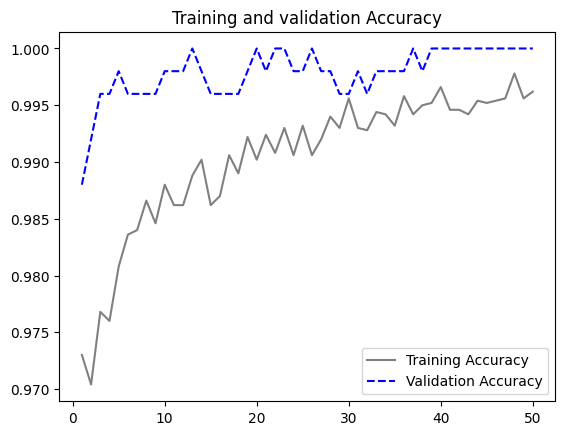

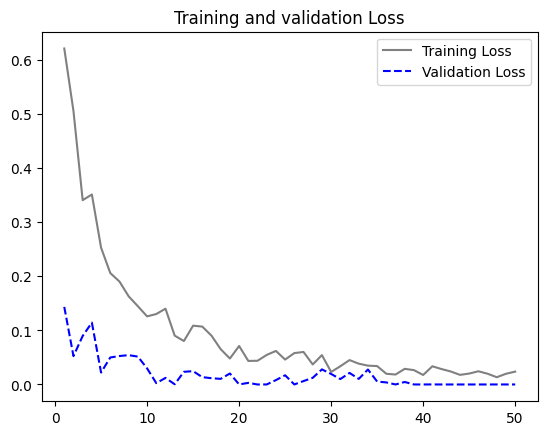

In [ ]:
acc = FineTuned_VGG_Model_3.history["accuracy"]
val_acc = FineTuned_VGG_Model_3.history["val_accuracy"]

loss = FineTuned_VGG_Model_3.history["loss"]
val_loss = FineTuned_VGG_Model_3.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("fine_tuning_vgg_model3.keras")
FineTuned_VGG_Model_3_Results = best_model.evaluate(test_dataset)
print(f"Loss: {FineTuned_VGG_Model_3_Results[0]:.3f}")
print(f"Accuracy: {FineTuned_VGG_Model_3_Results[1]:.3f}")

16/16 [==============================] - 1s 32ms/step - loss: 1.5571e-08 - accuracy: 1.0000
Loss: 0.000
Accuracy: 1.000


<font size="4.5">After building 15 models in total—two of which are optimized copies of the original models—we are now ready to compare the models to identify which of the two categories—Scratch Models and Pre-Trained Models—perform the best. Our immediate goal is to assess the best scratch-built model. Comparing the accuracy and loss metrics of the ten models constructed using four distinct training samples is the evaluation's main task. The main goal is to determine the ideal training sample size for the dog and cat classification problem.
<font>

<font size="3"><b>Model 1:</b> filters from 32 to 256, 5 Input Layers</font>

<font size="3"><b>Model 2:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5</font>

<font size="3"><b>Model 3:</b> <u>filters from 32 to 512, 6 Input Layers</u>, Augmented Images and Dropout rate of 0.5</font>

<font size="3"><b>Model 4:</b> <u>filters from 64 to 1024</u>, 5 Input Layers, Augmented Images and Dropout rate of 0.6 </font>

<font size="3"><b>Model 5:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5, <u>training size 2000</u></font>

<font size="3"><b>Model 6:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5, <u>training size 2000</u>, <u>Padding being same</u> </font>

<font size="3"><b>Model 7:</b> MaxPooling Operation,filters from 32 to 512, 5 Input Layers, Augmented Images, droput rate of 0.5, <u>Training Sample - 3000</u></font>

<font size="3"><b>Model 8:</b> <u>MaxPooling + Strides of Step-Size 2</u>,filters from 32 to 512, 5 Input Layers, Augmented Images, droput rate of 0.5, <u>Training Sample - 3000</u></font>

<font size="3"><b>Model 9:</b> <u>MaxPooling + Strides of Step-Size 2 with Padding turned on</u>,filters from 32 to 512, 5 Input Layers,Augmented Images, droput rate of 0.5, <u>Training Sample - 3000</u> </font>
    
<font size="3"><b>Model 10:</b> filters from 32 to 512, 5 Input Layers,Augmented Images, droput rate of 0.5, <u>Training Sample - 5000</u> </font>

In [ ]:
# Scratch Models
Model_1 = (0.653, 0.696)
Model_2 = (0.588, 0.714)
Model_3 = (0.620,0.674)
Model_4 = (0.604, 0.680)
Model_5 = (0.459,0.814)
Model_6 = (0.602,0.674)
Model_7 = (0.69,0.500)
Model_8 = (0.457,0.812)
Model_9 = (0.409,0.832)
Model_10 = (0.283,0.884)

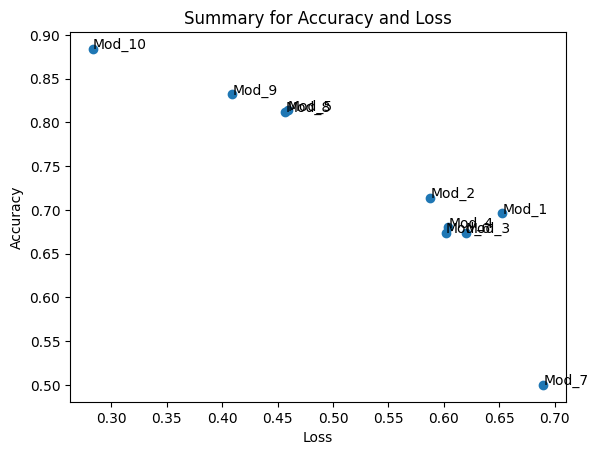

In [ ]:
Models_4 = ("Mod_1","Mod_2","Mod_3","Mod_4","Mod_5","Mod_6","Mod_7","Mod_8","Mod_9","Mod_10")
Loss_4 = (Model_1[0],Model_2[0],Model_3[0],Model_4[0],Model_5[0],Model_6[0],Model_7[0],Model_8[0],Model_9[0],Model_10[0])
Accuracy_4 = (Model_1[1],Model_2[1],Model_3[1],Model_4[1],Model_5[1],Model_6[1],Model_7[1],Model_8[1],Model_9[1],Model_10[1])

fig, ax = plt.subplots()
ax.scatter(Loss_4,Accuracy_4)
for i, txt in enumerate(Models_4):
    ax.annotate(txt, (Loss_4[i],Accuracy_4[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

<font size="4.5"><b>When it comes to scratch models, Model_10, which was trained on 5000 samples, turned out to be the best model with an impressive 90.2% accuracy and a 21.7% loss on the test set. A five-layer architecture with filters ranging from 32 to 256 was used to build Model 10. Augmented photos were integrated into the model during training, along with a max-pooling layer and a 0.5 dropout rate.
<b><font>

<font size="3">Next we built 5 models using the pre-trained vgg16 network, the first 3 were built using 1000 as sample and rmsprop as optimizer and the next 2 where built using 5000 as sample size and adam as optimizer<font>
    
<font size="3"><b>VGG 1:</b> filters from 32 to 256, 5 Input Layers</font>

<font size="3"><b>VGG 2:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5</font>

<font size="3"><b>VGG 3:</b> <u>filters from 32 to 512, 6 Input Layers</u>, Augmented Images and Dropout rate of 0.5</font>

<font size="3"><b>VGG 4:</b> VGG - Model 3 (5000 Training Samples) </font>

<font size="3"><b>VGG 5:</b> Fine Tunning VGG_Model_3 (Training Samples - 5000)</font>


In [ ]:
# Pre-Trained Models
VGG_Model_1 = (0.00,100)
VGG_Model_2 = (2.6,99.8)
FineTuned_VGG_Model_2 = (0.00,100)
VGG_Model_3 = (13.4,98.4)
FineTuned_VGG_Model_3 = (0.00,100)

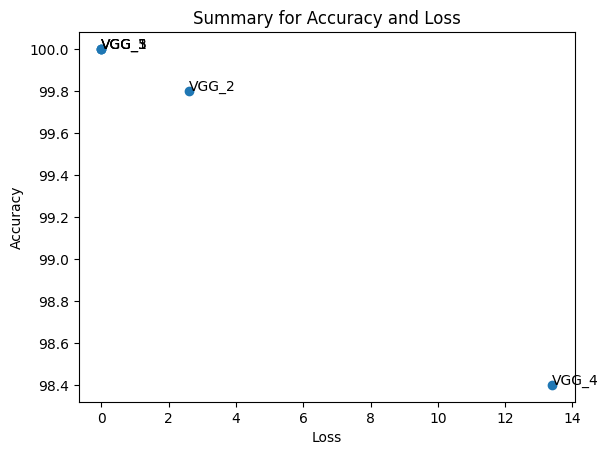

In [ ]:
Models_5 = ("VGG_1","VGG_2","VGG_3","VGG_4","VGG_5")
Loss_5 = (VGG_Model_1[0],VGG_Model_2[0],FineTuned_VGG_Model_2[0],VGG_Model_3[0],FineTuned_VGG_Model_3[0])
Accuracy_5 = (VGG_Model_1[1],VGG_Model_2[1],FineTuned_VGG_Model_2[1],VGG_Model_3[1],FineTuned_VGG_Model_3[1])

fig, ax = plt.subplots()
ax.scatter(Loss_5,Accuracy_5)
for i, txt in enumerate(Models_5):
    ax.annotate(txt, (Loss_5[i],Accuracy_5[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

<font size="3">When it came to pre-trained models, the best performers were Model_5 and Model_3, also known as FineTuned_VGG_Model_2 and FineTuned_VGG_Model_3, with an astounding 100% accuracy and a negligible 0.00% loss. This model was built using 2000 and 5000 training samples, and it was optimized at a learning rate of 0.000001 using the Adam optimizer
.<font>

<u><b> Conclusion </u></b>: <font size="3">According to the aforementioned analysis, a model's accuracy is closely related to the volume of training data and the underlying architecture, especially when the model is trained directly from its own data. On the other hand, if a pretrained model is used, the accuracy depends on the particular test set that is being assessed. It should be noted that robust performance on one set of data might not fully generalize to all other sets, and that some sets of samples might present more difficulties than others.
<font>

<u>Scrach Model : </u><font size="3">Test accuracy is significantly impacted by the model architecture and amount of the training sample. Remarkably, adding three modern architectures—batch normalization, depthwise separable convolutions, and residual connections—to a simple scratch model and combining dropout and data augmentation methods resulted in a significant boost in test accuracy. Additionally, increasing the number of training data samples from 1,000 to 3,000 produced notable increases in test accuracy. When the training dataset was further expanded to 6,000 samples, test accuracy values were reached that were similar to those of pretrained models. This is explained by the overfitting phenomenon, which occurs when there are not enough samples for the model to adequately generalize to new data. A larger dataset increases test accuracy by exposing the model to a greater range of the underlying data distribution.
<font >

<u>pretrained network : </u> <font size="3">However, even while test accuracy is highest when using a pretrained network, the size of the training sample has little bearing on the results. This is a result of the accuracy-measuring model not being trained using the data it handles. Furthermore, methods like data augmentation and fine-tuning do not significantly improve accuracy because the original pretrained model already has high-performance accuracy, owing to the large size of the dataset used in the pretrained VGG16 model (more than 500 MB in size and more than 138 million parameters).
<font>



<font size="3">Since we achieved 100% accuracy with the pre-tuned model, I also think that using pretrained models isn't always the best option. Context-independent reasoning states that the background or context of an image does not influence the ability to discriminate between a dog and a cat in the images used for this exercise. As a result, if a pretrained model is able to separate images, it may be applied to any image differentiation job provided that the training goal and the sample images belong to the same category.
.<font>